In [22]:
import numpy as np
import matplotlib.pyplot as plt
import backbone.Distributions as dist
import importlib
import numpy as np
from astroML.plotting import hist

import backbone.AstroMLmod as AstroMLmod
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
random.seed(42)
import math
import time as time
import pandas as pd
importlib.reload(dist)
plt.rcParams.update({'font.size': 20}) 
from sklearn.utils import check_random_state
rng = check_random_state(42)

# Gaussian Zoo generator

## The behavior of the correlation function as we increase the sparseness of gaussians

Chi-Square score:  241727.88616142175
L2 Norm score:  0.54595104587506
Chi-Square score:  140426.61170291327
L2 Norm score:  0.3904020918890891
Chi-Square score:  28855.632262386815
L2 Norm score:  0.25647851922042847
Chi-Square score:  1561.0771044805633
L2 Norm score:  0.1793798303104443
Chi-Square score:  12.777875835447837
L2 Norm score:  0.07660474992851563
Chi-Square score:  1.4010518170544863
L2 Norm score:  0.137126673178067


<Figure size 1920x1440 with 0 Axes>

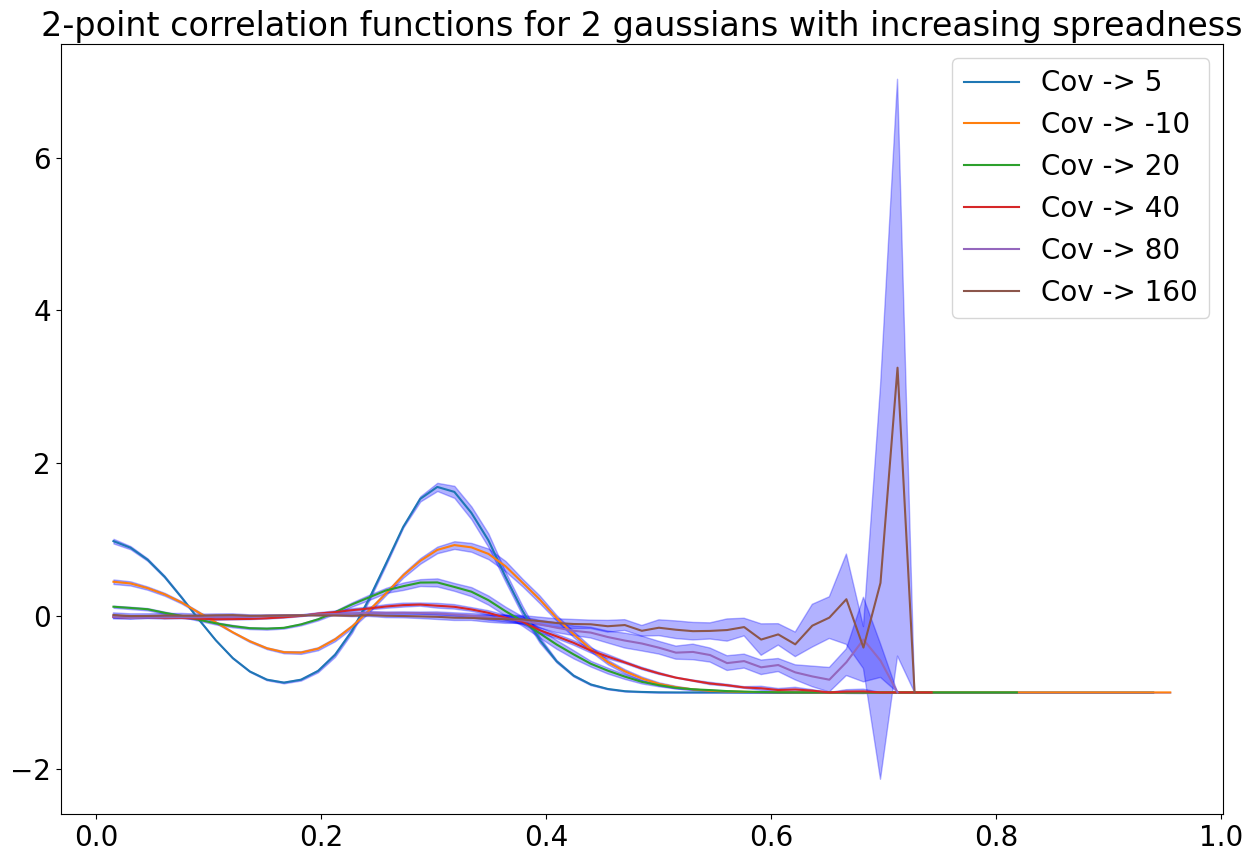

In [58]:
importlib.reload(dist)

importlib.reload(dist)
importlib.reload(AstroMLmod)

fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})


cov_range = []
times_array = []
structure = []

dimensions = 2  
mean_range = (-50, 50)
cov_range = (-10, 10)  
num_samples = 2 
points_per_gaussian = 2000
n_points = points_per_gaussian*num_samples
a = 100
b = 100
structure = []

for cov_range in [(5, 5),(10, 10),(20,20),(40,40),(80,80),(160,160)]:
    means,covariances = dist.sample_means_and_covariances(dimensions, mean_range, cov_range, num_samples, seed = 7)
    
    covariances = [[[cov_range[0],0],[0,cov_range[0]]],[[cov_range[0],0],[0,cov_range[0]]]]
    #Creating a feature space samples from Gaussians
    gaussian_space = dist.generate_gaussian_points(means[0]/2,covariances[0],points_per_gaussian)
    for mean,covariance in zip(means[1:],covariances[1:]):
        
        gaussian_space = np.concatenate((gaussian_space,dist.generate_gaussian_points(mean, covariance,points_per_gaussian)),axis = 0)
    gaussian_space = gaussian_space/max(np.max(gaussian_space),abs(np.min(gaussian_space)))
    #dist.scatter_points(gaussian_space, alpha = 0.10)

    #dist.scatter_points(data_R, alpha = 0.10)

    timer = time.time()
    corr, dcorr, Structurescore,NormScore = AstroMLmod.correlate_and_plot(gaussian_space, max_dist = 3, plot = False)
    bins = np.linspace(0, 1.5, 100)
    plt.plot(bins[1:],corr,label = "Cov -> "+ str(cov_range[0]))
    plt.fill_between(bins[1:],corr-dcorr, corr+dcorr, color = "blue",alpha = .3)
plt.legend()
plt.title("2-point correlation functions for 2 gaussians with increasing spreadness")
plt.show() 

ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

<Figure size 1920x1440 with 0 Axes>

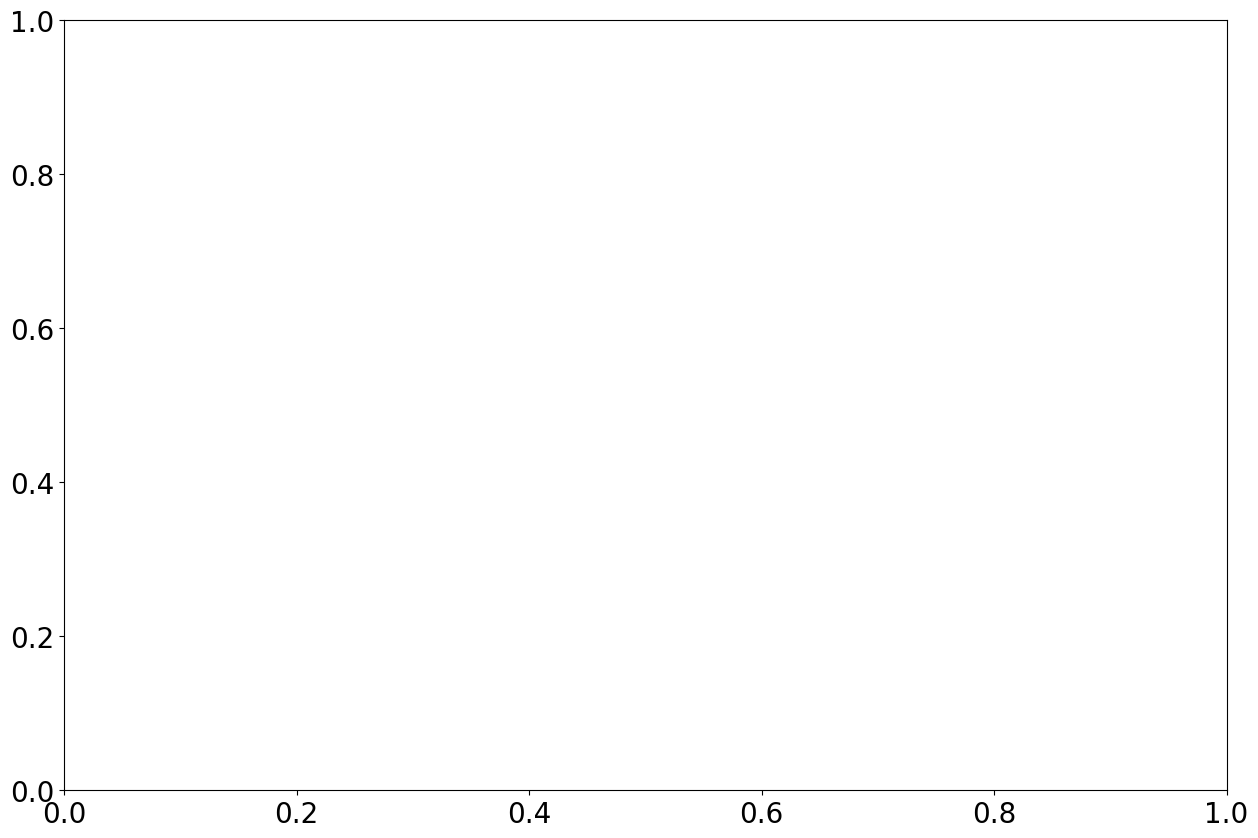

In [20]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 
cov_ranges = [5,10,15,20,25,30]
x2 = cov_ranges
yerr2 = np.array([b/2 for a,b in structure])
y2 = np.array([a for a,b in structure])
plt.plot(cov_ranges,[a for a,b in structure],markersize=5,label  = "Random Weights", c = "blue")
plt.fill_between(x2, y2-yerr2, y2+yerr2, color = "blue",alpha = .3)
plt.errorbar(x2, y2, yerr=yerr2, c = "blue")
plt.ylabel("KNN accuracy",fontsize = 15)
plt.xlabel("Epochs",fontsize = 15)
plt.show()

<Figure size 1920x1440 with 0 Axes>

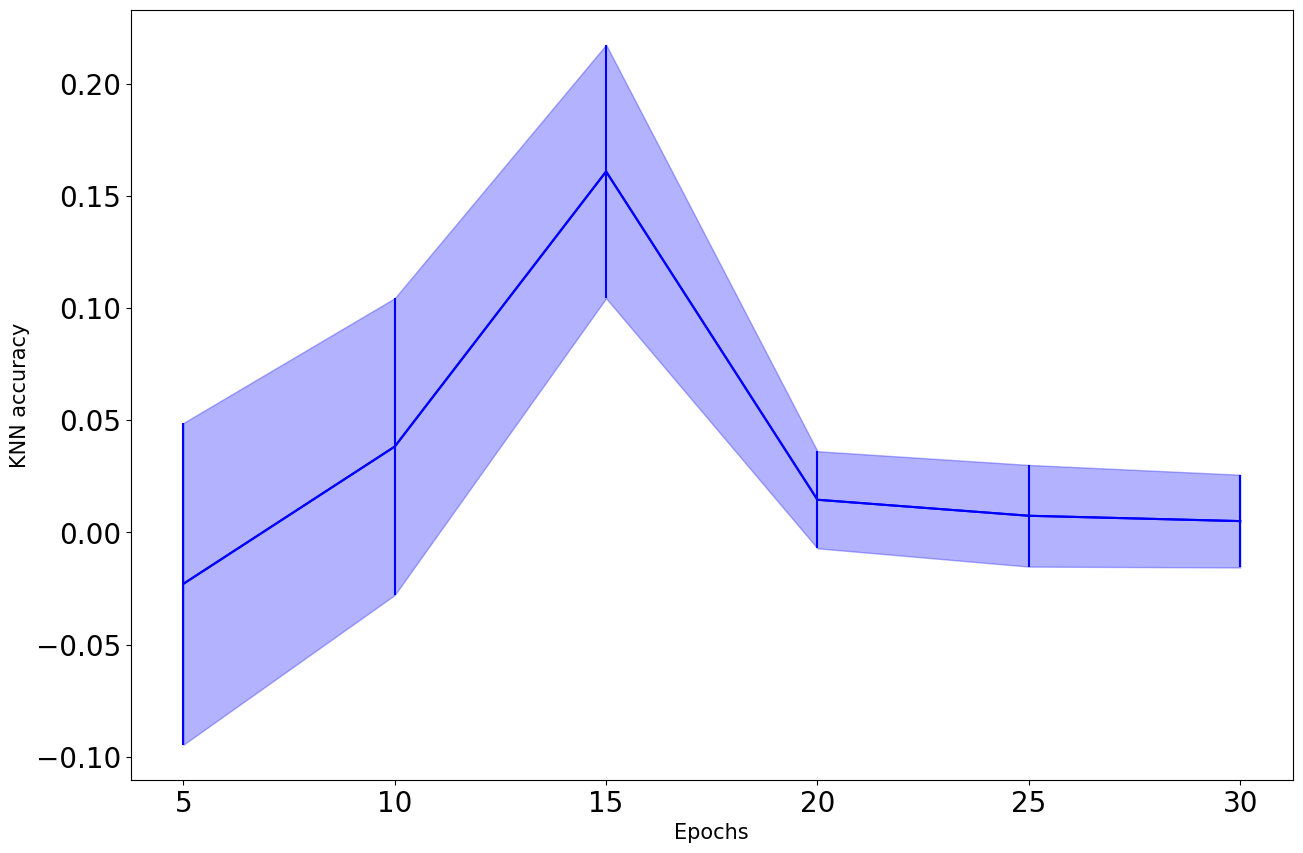

In [ ]:
if data_R is None:
    data_R = data.copy()
    for i in range(n_features - 1):
        rng.shuffle(data_R[:, i])

In [37]:
squared_bootstraps = np.array([[0,1,1],[2,2,2],[3,3,3]])

corr = np.ma.masked_invalid(squared_bootstraps).mean(0)
error = np.ma.masked_invalid(squared_bootstraps).std(0)



(masked_array(data=[1.6666666666666667, 2.0, 2.0],
              mask=[False, False, False],
        fill_value=1e+20),
 masked_array(data=[1.247219128924647, 0.816496580927726,
                    0.816496580927726],
              mask=[False, False, False],
        fill_value=1e+20))

In [171]:
print(len(bootstraps))
len(np.ma.masked_invalid(bootstraps.mean(0)))

10


99

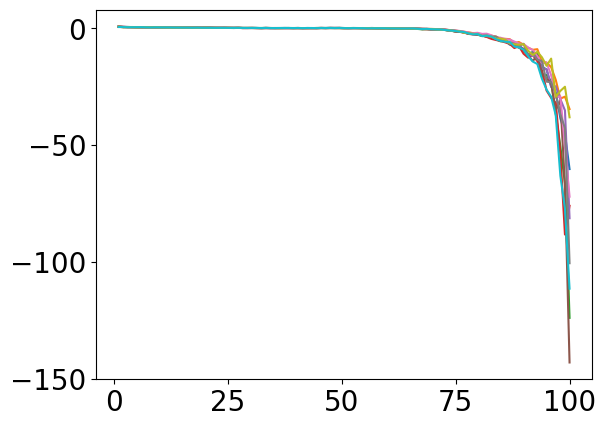

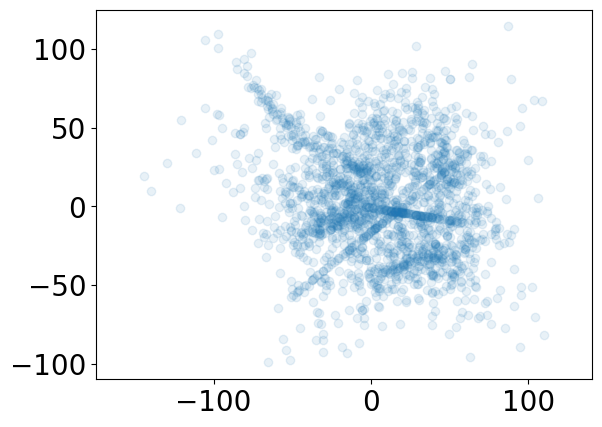

In [33]:
for bootstrap in bootstraps:
    plt.plot(bins[1:],bootstrap)
plt.show()
dist.scatter_points(gaussian_space, alpha = 0.10)

In [121]:
print(times_array,number_points,structure)


## Two point correlation plot

#Here I bootstrap the correlation function to get an estimate of errors

[0.6101515293121338] [100] [8.827753007703668]


In [9]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 

a = 150
b = 100
bins = np.linspace(0, a, b )
#corr = two_point(gaussian_space , bins, method = 'landy-szalay')

timer = time.time()
corr, dcorr = bootstrap_two_point(gaussian_space, bins, Nbootstrap=5,method = 'landy-szalay')
import matplotlib.pyplot as plt

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [ ]:
plt.plot(np.ma.masked_invalid(corr), label = " 10 Gaussians")

#hist(corr)
#bins = np.linspace(0, a, b)
corr = two_point(uniform_points_disk , bins,method = 'landy-szalay')
#import matplotlib.pyplot as plt
plt.plot(corr, label = "Disk (diameter hundred)")
#hist(corr)

bins = np.linspace(0, a, b)
corr = two_point(uniform_points_square , bins, method  = 'landy-szalay')
import matplotlib.pyplot as plt
plt.plot(corr, label = "Square (100 by 100)")
#dist.plot_autocorrelation_2d(bins, corr,title = "Correlation")
#hist(corr)




plt.title("Landy-Szalay")
plt.legend()
plt.show()

In [18]:
from sklearn.utils import check_random_state
n_samples = 20000
indices = check_random_state(42).randint(0, n_samples, n_samples)
indices = list(indices)
count = 0
seen = []
for a in indices:
    if indices.count(a)>1 and a not in seen:
        count+=1
        seen.append(a)
        
print(count)

5267


## Chi-square distributions

Here I compute the reduced chi-square to quantify the structture in the function

$$\chi^2 = \frac{1}{N} \sum \frac{corr^2}{\sigma ^2}$$


In [66]:



structure.append(reduced_chi_square(observed =corr ,errors = dcorr))

16.59620108863754

## Experiment 1: How does this scale with datapoints?

In [199]:
cov_range = [(-5, 5),(-10, 10),(-15,15),(-20,20),(-25,25),(-30,30)]
data = {'Time stamp': times_array,
        'Cov_range': cov_range,
        'Structure_index':structure
      }


df = pd.DataFrame(data)

title = "Parameters of the Gaussians are: dimensions = 2 mean_range = (0 -100), num_samples = 1000*20 "

# Write to CSV with a title
with open('covariance_nonchi_square.csv', 'w') as f:
    f.write(title + '\n')  # Add the title
    df.to_csv(f, index=False)  # Write DataFrame to CSV without index

In [200]:
df = pd.read_csv('covariance_nonchi_square.csv', skiprows = 1)
df            

,Time stamp,Cov_range,Structure_index
0,151.900244,"(-5, 5)","(0.1253484173586041, 2.6897082354960644)"
1,170.162937,"(-10, 10)","(0.08406057528042993, 0.6890739495126141)"
2,180.707930,"(-15, 15)","(0.022571507974236085, 0.23799901133369677)"
3,190.663771,"(-20, 20)","(0.004301938166512209, 0.08441362227409019)"
4,198.190400,"(-25, 25)","(0.0010481882475334486, 0.01676076627155966)"
5,198.768602,"(-30, 30)","(0.0013268879790020688, 0.016789833151431108)"


<Figure size 1920x1440 with 0 Axes>

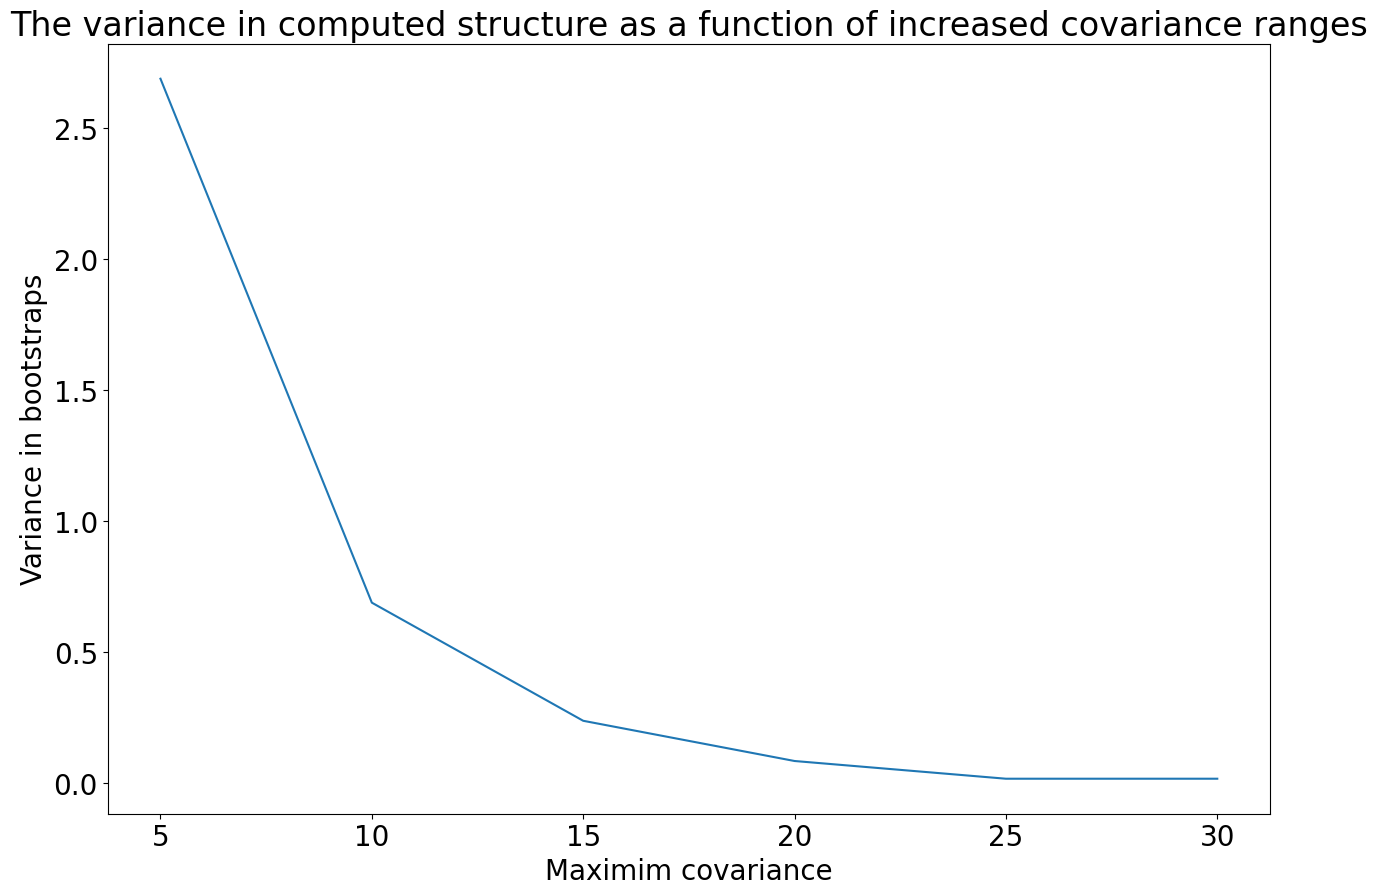

In [196]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 


tag = "Time stamp"
plt.plot([5,10,15,20,25,30],[b for a,b in structure], label = "Time in seconds")
#plt.plot(df["Numper of points per gaussian"],df["Structure_index"], label = "Structure index")
plt.xlabel("Maximim covariance")
plt.ylabel("Variance in bootstraps")
plt.title("The variance in computed structure as a function of increased covariance ranges")
plt.show()

In [ ]:
title = "Parameters of the Gaussians are: dimensions = 2 mean_range = (0 -100) cov_range = (-10 -  10) num_samples = 10 "
df